**Part I: Logistic Regression Model:**

**A. Bring the dataset week_vacation into your environment, and use the head()
function to explore the variables.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving week_vacation.csv to week_vacation.csv


In [3]:
week_vacation = pd.read_csv('week_vacation.csv')
print(week_vacation)

      householdID          state            lodging              dining  \
0             795   Rhode Island       Mainer Motel  Snack Shack Viking   
1             465   Rhode Island       Mainer Motel   Lobsterama Viking   
2             615    Connecticut       Mainer Motel               Other   
3             666    Connecticut       Mainer Motel               Other   
4            1318    Connecticut       Mainer Motel    Grand Mainer VIP   
...           ...            ...                ...                 ...   
5995         5964  New Hampshire              Other   Lobsterama Viking   
5996         5972          Maine            Big Ken   Lobsterama Viking   
5997         5973  Massachusetts              Other               Other   
5998         5997        Vermont            Big Ken   Lobsterama Viking   
5999         5999  Massachusetts  Portland Sea View               Other   

                 rental  merch_store maine_historic  householdpax  \
0     Luxury Sports Car   101.

In [4]:
week_vacation.head()

,householdID,state,lodging,dining,rental,merch_store,maine_historic,householdpax,AGI,return
0,795,Rhode Island,Mainer Motel,Snack Shack Viking,Luxury Sports Car,101.538340,No,4,141722.245711,1
1,465,Rhode Island,Mainer Motel,Lobsterama Viking,Luxury Sports Car,83.256816,Yes,7,141491.303906,1
2,615,Connecticut,Mainer Motel,Other,SUV,80.955348,No,5,136825.347272,0
3,666,Connecticut,Mainer Motel,Other,SUV,87.085150,Yes,4,139517.255488,1
4,1318,Connecticut,Mainer Motel,Grand Mainer VIP,SUV,80.361456,Yes,4,135448.538304,1


**B. Which of the variables here are categorical? Which are numerical?**

*Categorical Variables : householdID, state, lodging, dining, rental, maine_historic, return.* 

*Numeric Variables : householdpax, AGI, merch_store.*

**C. Use the value_counts() function from pandas to learn more about the outcome
variable, return. Describe your findings -- what are the different outcome classes
here, and how common are each of them in the dataset?**

In [5]:
week_vacation['return'].value_counts()

1    3809
0    2191
Name: return, dtype: int64

*iThe count() function counts the number of not empty values for each row, or column. Here, we have specified the function for outcome variable 'return'. The count function returns that 3809 rows or households have accepted the discounted return offer and 2191 families have rejected the offer.*

**D. Call the describe() function on the dataset.**

**a. Do you see any impossible values here? If so, take whatever step(s) that you feel are appropriate for handling those values. How did you handle the impossible values?**

In [6]:
week_vacation.describe()

,householdID,merch_store,householdpax,AGI,return
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,3000.500000,78.819533,3.116667,131197.932552,0.634833
std,1732.195139,12.040140,1.180800,8830.709226,0.481517
min,1.000000,33.742908,-1.000000,101707.425922,0.000000
25%,1500.750000,70.692860,2.000000,125394.401669,0.000000
50%,3000.500000,78.855281,3.000000,131191.340581,1.000000
75%,4500.250000,86.781407,4.000000,137180.198223,1.000000
max,6000.000000,128.004971,7.000000,166768.851963,1.000000


In [7]:
week_vacation1= week_vacation.drop("householdID",axis=1,inplace= True)


*Describe() function provides the statistical summary of the dataset week_vacation. Here householdID is not required for modeling purposes. It is just a unique identifier and doesnot actually represent any numerical value.Merch_store, AGI and return looks fine. But the values of householdpax varies from -1 to 7. As the number of households can never be negative. -1 is not realistically possible. Hence it is necessary to drop the values which are negative. It is shown in part b of this section.*


**b. If any financial variables here are measured with more than two decimal
places of precision, change this so that only two digits to the right of the
decimal point are used.**

In [8]:
week_vacation1=week_vacation[week_vacation['householdpax']>0]

In [9]:
week_vacation1

,state,lodging,dining,rental,merch_store,maine_historic,householdpax,AGI,return
0,Rhode Island,Mainer Motel,Snack Shack Viking,Luxury Sports Car,101.538340,No,4,141722.245711,1
1,Rhode Island,Mainer Motel,Lobsterama Viking,Luxury Sports Car,83.256816,Yes,7,141491.303906,1
2,Connecticut,Mainer Motel,Other,SUV,80.955348,No,5,136825.347272,0
3,Connecticut,Mainer Motel,Other,SUV,87.085150,Yes,4,139517.255488,1
4,Connecticut,Mainer Motel,Grand Mainer VIP,SUV,80.361456,Yes,4,135448.538304,1
...,...,...,...,...,...,...,...,...,...
5995,New Hampshire,Other,Lobsterama Viking,Luxury Sports Car,77.649961,No,3,129068.275201,1
5996,Maine,Big Ken,Lobsterama Viking,Other,62.474236,Yes,3,130259.720842,1
5997,Massachusetts,Other,Other,SUV,65.484996,Yes,2,125243.563471,1
5998,Vermont,Big Ken,Lobsterama Viking,Other,71.459042,No,3,128374.508583,0


**E. For your categorical input variables, do you need to take any steps to convert
them into dummies, in order to build a logistic regression model? Why or why
not?**

**a. If you answered “yes” to the previous question, dummify your categorical
inputs now, being sure to drop one level as you do.**

In [10]:
week_vacation2=pd.get_dummies(week_vacation1,drop_first=True, columns=['state',	'lodging',	'dining',	'rental',	'maine_historic'])

In [11]:
week_vacation2.columns

Index(['merch_store', 'householdpax', 'AGI', 'return', 'state_Maine',
       'state_Massachusetts', 'state_New Hampshire', 'state_Rhode Island',
       'state_Vermont', 'lodging_Mainer Motel', 'lodging_Other',
       'lodging_Portland Sea View', 'dining_Lobsterama Viking', 'dining_Other',
       'dining_Snack Shack Viking', 'rental_Other', 'rental_SUV',
       'rental_Sedan', 'maine_historic_Yes'],
      dtype='object')

*Yes we need to convert the categorical variables into dummies for logistic regression model as it is beneficial in the event of a non-linearity in the numeric values, more flexible and allows multiple comparisions to be made.*

**F. Create a data partition. For your random_state value, use a number based on
either your work, home, or school address, or just a number that you like (For
example, I live at 200 Market St, I work at 1010 Commonwealth Avenue, and my
lucky number is 80, so I could use either 200, 1010, or 80). Assign 40% of your
rows to your test set, and 60% to your training set.**

In [12]:
X= week_vacation2[['merch_store','householdpax','AGI','state_Maine','state_Massachusetts','state_New Hampshire','state_Rhode Island','state_Vermont','lodging_Mainer Motel',
                   'lodging_Other','lodging_Portland Sea View','dining_Lobsterama Viking','dining_Other','dining_Snack Shack Viking','rental_Other','rental_SUV','rental_Sedan','maine_historic_Yes']]
y= week_vacation2['return']

In [13]:
X.corr()

,merch_store,householdpax,AGI,state_Maine,state_Massachusetts,state_New Hampshire,state_Rhode Island,state_Vermont,lodging_Mainer Motel,lodging_Other,lodging_Portland Sea View,dining_Lobsterama Viking,dining_Other,dining_Snack Shack Viking,rental_Other,rental_SUV,rental_Sedan,maine_historic_Yes
merch_store,1.000000,-0.039043,-0.001408,-0.003323,0.000215,0.009228,-0.014557,0.000218,-0.005423,0.000847,-0.009403,0.010399,0.005591,-0.011179,-0.005989,-0.011086,0.016235,-0.011151
householdpax,-0.039043,1.000000,0.011800,0.022158,-0.027393,-0.007629,-0.001217,0.009145,-0.004848,-0.011863,-0.007281,0.010891,-0.004067,-0.004786,0.004777,-0.019618,0.007247,0.013359
AGI,-0.001408,0.011800,1.000000,-0.002198,0.012137,-0.007332,-0.012439,-0.023076,0.009686,-0.008182,0.008961,-0.000365,-0.002046,0.001461,-0.009289,0.017413,-0.010313,0.007137
state_Maine,-0.003323,0.022158,-0.002198,1.000000,-0.309386,-0.212154,-0.113327,-0.113473,-0.009866,0.023943,-0.005999,0.006615,0.011297,-0.021711,-0.006320,0.017523,-0.023037,0.001964
state_Massachusetts,0.000215,-0.027393,0.012137,-0.309386,1.000000,-0.387781,-0.207143,-0.207409,-0.007411,-0.027724,0.004720,-0.006679,0.001308,-0.000211,0.008153,-0.013940,-0.018195,-0.010409
state_New Hampshire,0.009228,-0.007629,-0.007332,-0.212154,-0.387781,1.000000,-0.142043,-0.142226,0.031141,-0.003044,0.009896,-0.008940,-0.003910,0.007296,-0.001282,0.000577,0.023104,0.021325
state_Rhode Island,-0.014557,-0.001217,-0.012439,-0.113327,-0.207143,-0.142043,1.000000,-0.075973,-0.022763,-0.009680,0.003680,0.008478,-0.011375,0.012431,-0.021684,0.000106,0.010859,0.005869
state_Vermont,0.000218,0.009145,-0.023076,-0.113473,-0.207409,-0.142226,-0.075973,1.000000,-0.023005,0.010357,-0.006288,-0.015112,0.017343,0.014019,0.018472,-0.016345,-0.008988,0.002420
lodging_Mainer Motel,-0.005423,-0.004848,0.009686,-0.009866,-0.007411,0.031141,-0.022763,-0.023005,1.000000,-0.255257,-0.211976,0.001502,0.009515,-0.019134,-0.008304,-0.000324,-0.004053,0.020822
lodging_Other,0.000847,-0.011863,-0.008182,0.023943,-0.027724,-0.003044,-0.009680,0.010357,-0.255257,1.000000,-0.329047,0.013563,-0.008778,-0.022273,0.010482,0.003272,-0.009924,0.012722


In [16]:
X.describe()

,merch_store,householdpax,AGI,state_Maine,state_Massachusetts,state_New Hampshire,state_Rhode Island,state_Vermont,lodging_Mainer Motel,lodging_Other,lodging_Portland Sea View,dining_Lobsterama Viking,dining_Other,dining_Snack Shack Viking,rental_Other,rental_SUV,rental_Sedan,maine_historic_Yes
count,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000,5927.000000
mean,78.813492,3.155728,131213.639863,0.144761,0.361228,0.210056,0.070525,0.070693,0.141218,0.283786,0.214611,0.292222,0.340138,0.144424,0.209043,0.495023,0.077948,0.580395
std,12.047879,1.133754,8826.938016,0.351890,0.480397,0.407382,0.256051,0.256334,0.348276,0.450872,0.410587,0.454822,0.473795,0.351549,0.406660,0.500017,0.268113,0.493536
min,33.742908,1.000000,101707.425922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.690460,2.000000,125430.067016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.846787,3.000000,131191.592780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,86.744009,4.000000,137195.095168,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,128.004971,7.000000,166768.851963,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**a. How did you pick your seed value?**

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=302)

*I have chosen the seed state based on my apartment number. I live in Brighton and my apartment number is 302. So I have chosen the seed value as 302.*

**G. Build a logistic regression model using Python, with the outcome variable return.
Use the rest of the variables from the dataset as inputs (except ID). Remember
to use only your training data to build this model.**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [20]:
logr_model= LogisticRegression()
logr_model.fit(X_train,y_train)
predict_test=logr_model.predict(X_test)
accuracy_score(y_test,predict_test)

0.6579502319696331

**H. Show your model’s coefficients.**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
pd.DataFrame(data=logr_model.coef_.transpose(),index=X_train.columns,columns=['Coef'])

,Coef
merch_store,0.042236
householdpax,0.000500
AGI,-0.000021
state_Maine,0.000006
state_Massachusetts,-0.000129
state_New Hampshire,0.000112
state_Rhode Island,0.000055
state_Vermont,-0.000006
lodging_Mainer Motel,-0.000397
lodging_Other,0.000121


**a. Which of your numeric variables appear to influence the outcome
variable the most? Which ones have the least impact? Choose any three
variables that seem to matter for this model, and write a sentence or two
for each with your thoughts about their importance. You can think about
your own experience as a traveler as you write this.
b. Now look at the categorical variables and their coefficients. What stands
out here among these?**

*Impact of the input variable on the outcome is completely dependent on the value or magnitude of coefficient. A variable with highest coefficient will have maximum impact on the output and its directly proportional*

*Merch_store numeric variable appears to influence the outcome variable the most as it has the highest coefficient value. Whereas, AGI numeric variable has the least impact in a negative direction.
Merch_store is most significant as the likelihood of the outcome is supposed to be increased by 0.042.It can be predicted as visitors that make purchases at Lobsterland merchandise store can afford to book a renewal for 2022 at a discounted price. Hence, the visitors that often make purchases at merch_store has a huge influence on the outcome variable.*

*householdpax represents the number of people in a household.This input variable has a significant influence on the 'return' values. As the number of values of householdpax increases, the Lobsterland tends to attract more people to the park. With a large value of coefficient of householdpax there is a great possibility or influence for its visitors to return next year hence possibility of renewal for 2022.*

*AGI coefficient is negative representing the least influence on the outcome variable as the adjusted gross income of the households has no relation to their spending at the Lobsterland.*

**b. Now look at the categorical variables and their coefficients. What stands out here among these?**

*lodging_portland sea View represents the lodging options selected by household for their Lobsterland visit.The coefficient value of 0.000152 represents its influence on the outcome variable. It clearly states that if the households were able to afford Portland sea view hotel there is a positive influence on spending for renewal for 2022 at a discounted price.
Households renting SUV has more possibility to renew the booking for 2022 than sedan or other options. Households dining at Lobsterama Viking and other restaurants also have a huge impact on the outcome variable as they can afford a renewal for 2022. It is pretty obvious that households who afford good lodging and dining options can also afford to buy the renewal for 2022 at a discounted price.*

**I. Assess the performance of your model against the test set. Build a confusion
matrix, and answer the following questions about your model. You can use
Python functions to answer any of these questions or you can use your confusion
matrix to determine the answers in a slightly more manual way. The ‘positive’
class in this model is represented by the “1” outcome.
a. What is your model’s accuracy rate?
b. What is your model’s sensitivity rate?
c. What is your model’s specificity rate?
d. What is your model’s precision?
e. What is your model’s balanced accuracy?**

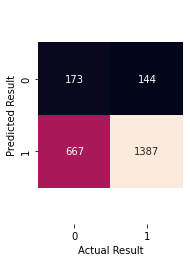

In [42]:
%matplotlib inline
mat = confusion_matrix(predict_test, y_test)
sns.heatmap(mat,fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
#mat.yaxis.set_ticklabels(['False','True'])667-fp,173-tn,144-fn,1387-tp, 1560
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show() 

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.55      0.21      0.30       840
           1       0.68      0.91      0.77      1531

    accuracy                           0.66      2371
   macro avg       0.61      0.56      0.54      2371
weighted avg       0.63      0.66      0.61      2371



*a.Accuracy Rate: TP+TN/All = 173+1387/2371 = 0.6579= 65%*

*b.Sensitivity Rate: TP/TP+FN = 1387/1387+144 = 0.9059= 90.59%*

*c.Specificity Rate: TN/TN+FP = 173/173+667 = 0.2059= 20.59%*

*d.Precision: TP/TP+FP = 1387/1387+667 = 0.6752= 67.52%*

*e.Model's balanced accuracy: 0.9059+0.2059/2= 0.5559*

**J. Compare your model’s accuracy against the training set vs. accuracy against the
test set (just use accuracy only for this).
a. What is the purpose of comparing those two values?
b. In this case, what does the comparison of those values suggest about the
model that you have built?**

In [25]:
predict_test=logr_model.predict(X_test)
accuracy_score(y_test,predict_test)

0.6579502319696331

In [26]:
predict_train=logr_model.predict(X_train)
accuracy_score(y_train,predict_train)

0.6456692913385826

**a. What is the purpose of comparing those two values?**

*Predictions against training set and test set is shown above. For the object predict_train we are using the training set as input for logical regression model. It is used to compare the predicted outcomes with the actual outcomes.
Similar thing was performed with the test set as well. Since the model is built with training data, it uses this data to come up with an generalised equation in order to define a relationship between input variable and the ouput variable: return.*

**b. In this case, what does the comparison of those values suggest about the model that you have built?**

*Values of predict_train and predict_test indicate that the model is extremely divergent and is suitable for wide set of data. It also shows that it is extremely relible and useable for new data.*

**K. Make up a household. Assign this household a value for each predictor variable
in this model, and store the results in a new dataframe. Now, put your
household through this model.
a. What did your model predict -- will this household take the return offer?
b. According to your model, what is the probability that the household will
accept the offer?**

In [27]:
Sample1=pd.DataFrame([{'merch_store':83, 'householdpax': 4, 'AGI': 149266.32,'state_Maine': 0,'state_Massachusetts': 0,'state_New Hampshire': 0,'state_Rhode Island': 1,'state_Vermont': 0,'lodging_Mainer Motel':0,
                   'lodging_Other': 1,'lodging_Portland Sea View': 0,'dining_Lobsterama Viking':0,'dining_Other':0,'dining_Snack Shack Viking':1,'rental_Other':0,'rental_SUV':1,'rental_Sedan':0,'maine_historic_Yes':0}])

In [28]:
new_predict = logr_model.predict(Sample1)
new_predict

array([1])

In [29]:
logr_model.predict_proba(Sample1)

array([[0.40928984, 0.59071016]])

*A - The model predicts that the household will accept the offer.*


*B - Probability of accepting this offer is 59%*

**L. When using a logistic regression model to make predictions, why is it important
to only use values within the range of the dataset used to build the model?
a. Make a new dataframe, but this time, for the numeric predictor variables,
select some numbers that are outside the range of the dataset -- do not use a 400+ year-old vampire named “Mary.” Use your model to
make a prediction for this new dataframe. What do you notice about the
result? (To answer this, don’t simply state the predicted outcome, but
also write 1-2 sentences of explanation for what you see).**

In [30]:
Sample2=pd.DataFrame([{'merch_store':140, 'householdpax': 20, 'AGI': 	176768.85,'state_Maine': 0,'state_Massachusetts': 0,'state_New Hampshire': 0,'state_Rhode Island': 1,'state_Vermont': 0,'lodging_Mainer Motel':0,
                   'lodging_Other': 1,'lodging_Portland Sea View': 0,'dining_Lobsterama Viking':0,'dining_Other':0,'dining_Snack Shack Viking':1,'rental_Other':0,'rental_SUV':1,'rental_Sedan':0,'maine_historic_Yes':0}])

In [31]:
new_predict1 = logr_model.predict(Sample2)
new_predict1

array([1])

In [32]:
logr_model.predict_proba(Sample2)

array([[0.09942417, 0.90057583]])

*Predictions are valid only for range of data used to estimate the model. When the values are outside the range, the relationship between the variables can change and the predictions become invalid. I have considered a data frame where the household spends 140 dollars in merch_store and capacity is 20. Homestate of the household is Rhode Island and decided to stay at Other lodging options. The model predicts 90% possibility for the household to the accept the discounted offer. This is not valid as the inputs are way outside the range and they are not properly interpretable. It does not seem to be realistic for a household of 20 people to redeem the offer for 2022. The results clearly states they are not valid and interpretable.* 

**Part II: Random Forest Model**

**M. Read the dataset back into Python. Dummify the categorical inputs again, but
this time, don’t drop any levels.**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from google.colab import files
uploaded = files.upload()

Saving week_vacation.csv to week_vacation (1).csv


In [45]:
week_vacation = pd.read_csv('week_vacation.csv')
print(week_vacation)

      householdID          state            lodging              dining  \
0             795   Rhode Island       Mainer Motel  Snack Shack Viking   
1             465   Rhode Island       Mainer Motel   Lobsterama Viking   
2             615    Connecticut       Mainer Motel               Other   
3             666    Connecticut       Mainer Motel               Other   
4            1318    Connecticut       Mainer Motel    Grand Mainer VIP   
...           ...            ...                ...                 ...   
5995         5964  New Hampshire              Other   Lobsterama Viking   
5996         5972          Maine            Big Ken   Lobsterama Viking   
5997         5973  Massachusetts              Other               Other   
5998         5997        Vermont            Big Ken   Lobsterama Viking   
5999         5999  Massachusetts  Portland Sea View               Other   

                 rental  merch_store maine_historic  householdpax  \
0     Luxury Sports Car   101.

In [46]:
week_vacation.head()

,householdID,state,lodging,dining,rental,merch_store,maine_historic,householdpax,AGI,return
0,795,Rhode Island,Mainer Motel,Snack Shack Viking,Luxury Sports Car,101.538340,No,4,141722.245711,1
1,465,Rhode Island,Mainer Motel,Lobsterama Viking,Luxury Sports Car,83.256816,Yes,7,141491.303906,1
2,615,Connecticut,Mainer Motel,Other,SUV,80.955348,No,5,136825.347272,0
3,666,Connecticut,Mainer Motel,Other,SUV,87.085150,Yes,4,139517.255488,1
4,1318,Connecticut,Mainer Motel,Grand Mainer VIP,SUV,80.361456,Yes,4,135448.538304,1


In [47]:
week_vacation.columns

Index(['householdID', 'state', 'lodging', 'dining', 'rental', 'merch_store',
       'maine_historic', 'householdpax', 'AGI', 'return'],
      dtype='object')

In [48]:
week_vacation1= week_vacation.drop("householdID",axis=1,inplace= True)
week_vacation1=week_vacation[week_vacation['householdpax']>0]

In [49]:
week_vacation2=pd.get_dummies(week_vacation1,drop_first=True, columns=['state','lodging','dining','rental','maine_historic'])

**N. Re-partition the data, using the same seed value that you used in the previous
part of this assignment**

In [50]:
from sklearn.model_selection import train_test_split
X= week_vacation2[['merch_store','householdpax','AGI','state_Maine','state_Massachusetts','state_New Hampshire','state_Rhode Island','state_Vermont','lodging_Mainer Motel',
                   'lodging_Other','lodging_Portland Sea View','dining_Lobsterama Viking','dining_Other','dining_Snack Shack Viking','rental_Other','rental_SUV','rental_Sedan','maine_historic_Yes']]
y= week_vacation2['return']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=302)

**O. Build a random forest model in Python with your training set. Use the same input variables, and same output variable, as you used in the logistic regression model (the only difference here is that the categories should not have any levels dropped). Use GridSearchCV to help you determine the best hyperparameter settings for your model.**

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
0,0.333633,merch_store
2,0.259822,AGI
1,0.089754,householdpax
17,0.033424,maine_historic_Yes
15,0.026981,rental_SUV
8,0.025593,lodging_Mainer Motel
12,0.024973,dining_Other
11,0.024249,dining_Lobsterama Viking
9,0.022863,lodging_Other
10,0.022102,lodging_Portland Sea View


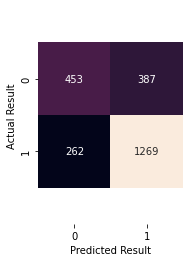

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()

In [55]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7030788696752425


In [56]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.47      0.53       840
           1       0.74      0.83      0.78      1531

    accuracy                           0.70      2371
   macro avg       0.67      0.65      0.66      2371
weighted avg       0.69      0.70      0.69      2371



In [57]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 8, 10, 12],
    'max_features': [12, 16, 20],
    'min_samples_leaf': [6, 10, 14],
}

In [58]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

{'max_depth': 4, 'max_features': 16, 'min_samples_leaf': 10, 'n_estimators': 150}


In [80]:
clf=RandomForestClassifier(n_estimators=150, max_depth=4, max_features=16, min_samples_leaf=10, random_state=600)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=16, min_samples_leaf=10,
                       n_estimators=150, random_state=600)

In [81]:
predictions = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7250105440742303


In [82]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.53      0.58       840
           1       0.76      0.83      0.80      1531

    accuracy                           0.73      2371
   macro avg       0.70      0.68      0.69      2371
weighted avg       0.72      0.73      0.72      2371



**P. How did your random forest model rank the variables in order of importance,
from highest to lowest? For a random forest model, how can you interpret
feature importance?**

In [83]:
feature_imp_df = pd.DataFrame(list(zip(clf.feature_importances_, X_train)))
feature_imp_df.columns = ['feature importance', 'feature']
feature_imp_df = feature_imp_df.sort_values(by='feature importance', ascending=False)
feature_imp_df

,feature importance,feature
0,0.602240,merch_store
2,0.195768,AGI
8,0.117028,lodging_Mainer Motel
13,0.032540,dining_Snack Shack Viking
1,0.028648,householdpax
4,0.005532,state_Massachusetts
11,0.004063,dining_Lobsterama Viking
12,0.001892,dining_Other
6,0.001653,state_Rhode Island
14,0.001628,rental_Other


*Random forest model has ranked the feature importance from highest to lowest. The values present in the feature importance columns are proportions that sum upto 1. Here the merch_store has the highest value so it indicates that it was more effective at separating the records into distinct groups. So merch_store has higher value so it indicates that the feature was more important it basically inidcates how useful it was to split the records into the group. Least important feature here was state_Vermont.*

**Q. Assess the performance of your model against the test set. Build a confusion
matrix to do this. You can use Python functions to answer any of these
questions or you can use your confusion matrix to determine the answers in a
slightly more manual way. The ‘positive’ class in this model is represented by the
“1” outcome.
a. What is your model’s accuracy rate?
b. What is your model’s sensitivity rate?
c. What is your model’s specificity rate?
d. What is your model’s precision?
e. What is your model’s balanced accuracy?**

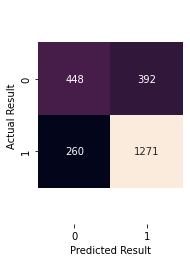

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
predictions = clf.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
plt.xlabel("Predicted Result")
plt.ylabel("Actual Result")
a, b = plt.ylim() 
a += 0.5 
b -= 0.5 
plt.ylim(a, b)
plt.show()
#tp:1271 ,tn:448  ,fp:260 , fn:392 , All:2371

In [85]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.53      0.58       840
           1       0.76      0.83      0.80      1531

    accuracy                           0.73      2371
   macro avg       0.70      0.68      0.69      2371
weighted avg       0.72      0.73      0.72      2371



*a.Accuracy Rate: TP+TN/All = 1271+448/2371 = 0.7250 = 72.50%*

*b.Sensitivity Rate: TP/TP+FN = 1271/1271+392 = 0.7642 = 76.42%*

*c.Specificity Rate: TN/TN+FP = 448/448+260 = 0.6327 = 63.27%*

*d.Precision: TP/TP+FP = 1271/1271+260 = 0.8301 = 83.01%*

*e.Model's balanced accuracy: 0.7642+0.6327/2 = 0.69845*

**R. Compare your model’s accuracy against the training set vs. your model’s
accuracy against the test set. How different were these results?**

In [86]:
predictions = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.7250105440742303


In [87]:
predict_train=clf.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, predict_train))

Accuracy: 0.7154105736782902


*Predictions againts training set and test set is shown above. For the object predict_train we are using the training set as input for random forest model.It is used to compare the predicted outcomes with the actual outcomes.  Similar thing was performed with the test set as well.Since the model is built with training data, it uses this data to come up with an generalised equation in order to define a relationship between input variable and the ouput variable: return.*

*Values of predict_train and predict_test indicate that the model is extremely divergent and is suitable for wide set of data. It also shows that it is extremely relible and useable for new data.*

**S. Use the predict() function with your model to classify the person who you
invented in the previous section. Does the model think this household will
accept the return offer?**

In [88]:
clf.predict(Sample1)

array([1])

In [89]:
clf.predict_proba(Sample1)

array([[0.20669359, 0.79330641]])

*The model predicts that the household will accept the offer.
  Probability of accepting this offer is 79%*

**T. For this question, no Python code is required -- just use a Markdown cell to
answer. Write a 3-5 sentence paragraph that speculates about why Lobster Land
might care about being able to use this model. There is not a single “correct”
answer to this question. Be thoughtful and be creative, and consider the
impact of being able to predict whether a specific household will
accept a particular offer. You can mention a marketing angle, an operations
angle, or anything else that comes to mind.**

*There are several reasons for LobsterLand to use Random forest Model because accuracy is greater for this model. This model also provides several feature level importance's for input variables this helps in determining the useful variable resulting in efficient outcomes. This model simplifies the task by identifying them. From marketing perspective, this model is very beneficial to come up with unique combinations of inputs. It helps in opting for appropriate choices when several options are available. Similarly, if Lobsterland wants to know the about the renewal they should focus more on the benefits and promotion or advertising of the renewal which might motivate the customers through it. From analytics point of view, marketing strategies can be designed prior for successful implementation of the promotion for renewal.*

